# Lead Scoring - Case Study ( By: Payal Sharma)

### Problem Statement

* An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

* Goals of Case Study

* a)Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

## Step 1: Importing Data

In [2]:
import pandas as pd
lead_df = pd.read_csv("Leads.csv")
pd.set_option('display.max_columns', None)
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

## Step 2: Inspecting the Dataframe


In [3]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
lead_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [5]:
# Missing Data Percentage 

round(lead_df.isnull().sum()/lead_df.shape[0], 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.16
How did you hear about X Education               0.24
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

### Looking at the dataset we observed that following things need to be done:

a)Encoding categorical variables

b)Missing value handling

c)Convert the Select into the NaN

d)Dropping columns having more than 70% null values

# Step 3: Data Preparation
Converting Yes/No to 1/0's:

In [6]:
# Encoding the variables with yes/no labels
for feature in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
            ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
           ,'A free copy of Mastering The Interview']:

    lead_df[feature] = lead_df[feature].apply(lambda x : 1 if x=='Yes' else 0)
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                        

### Converting SELECTs into NaNs:

In [7]:
# Listing the categorical variables yet to be encoded
lead_df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [8]:
# Checking the labels of the remaining categorical columns

for col in lead_df.iloc[:,1:].select_dtypes(include='object').columns:
    print(col)
    print("_________________________________________________________________________________________________")
    print(lead_df[col].value_counts(normalize= True))
    print("_________________________________________________________________________________________________")

Lead Origin
_________________________________________________________________________________________________
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
_________________________________________________________________________________________________
Lead Source
_________________________________________________________________________________________________
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone           

In [9]:
# Converting all the selects to NaN as the user didnt select any option from the list and "Select" is as good as "NaN"

lead_df = lead_df.replace('Select', np.nan)

In [10]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Missing Value Handling

In [11]:
#Dropping columns having more than 70% null values

lead_df = lead_df.drop(lead_df.loc[:,list(round(lead_df.isnull().sum()/lead_df.shape[0], 2)>0.70)].columns, 1)

C:\Users\hd\AppData\Local\Temp\ipykernel_1520\4048562962.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lead_df = lead_df.drop(lead_df.loc[:,list(round(lead_df.isnull().sum()/lead_df.shape[0], 2)>0.70)].columns, 1)


In [12]:
# As the Lead Quality depends upons the intuition of the employee, it will be safer to update the NaN to "Not Sure"

lead_df['Lead Quality'] = lead_df['Lead Quality'].replace(np.nan, 'Not Sure')

Comment: There are too many variations in the columns ('Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score') and it is not safer to impute any values in the columns and hence we will drop these columns with very high percentage of missing data

In [13]:
lead_df = lead_df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)


C:\Users\hd\AppData\Local\Temp\ipykernel_1520\3867664510.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lead_df = lead_df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)


In [14]:
# We can impute the MUMBAI into all the NULLs as most of the values belong to MUMBAI
lead_df['City'] = lead_df['City'].replace(np.nan, 'Mumbai')

# Since there is no significant difference among top 3 specialisation , hence it will be safer to impute NaN with Others
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Other_Specialization')

# For Tags column, more than 30% data is for "Will revert after reading the email" and hence we can impute NULLS with Will revert after reading the email
lead_df['Tags'] = lead_df['Tags'].replace(np.nan, 'Will revert after reading the email')

# More than 99% data is of "Better Career Prospects" and hence it is safer to impute NULLS with this value
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

# More than 85% data is of "Unemployed" and hence it is safer to impute NULLS with this value
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unemployed')

# More than 95% data is of "India" and hence it is safer to impute NULLS with this value
lead_df['Country'] = lead_df['Country'].replace(np.nan, 'India')

In [15]:
# Checking missing data percentage in the updated dataframe

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [16]:
# Remaining NULL values are less than 2% and hence these rows can be directly dropped
lead_df.dropna(inplace=True)

lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization What is your current occupation  \
0   India     Other_Specialization                      Unemployed   
1   India     Other_Specialization                      Unemployed   
2   India  Business Administration                         Student   
3   India    Media and Advertising                      Unemployed   
4   India     Other_Specialization                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing          Not Sure   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content    City  \
0                                  0                          0  Mumbai   
1                                  0                          0  Mumbai   
2                                  0                          0  Mumbai   
3                                  0                          0  Mumbai   
4                                  0                          0  Mumbai   

   I agree to pay the amount through cheque  \
0                                   

## Step 4: Exploratory Data Analysis

In [17]:
# Lets start with the target variable and see if we have any data imbalance or not 
lead_df["Converted"].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

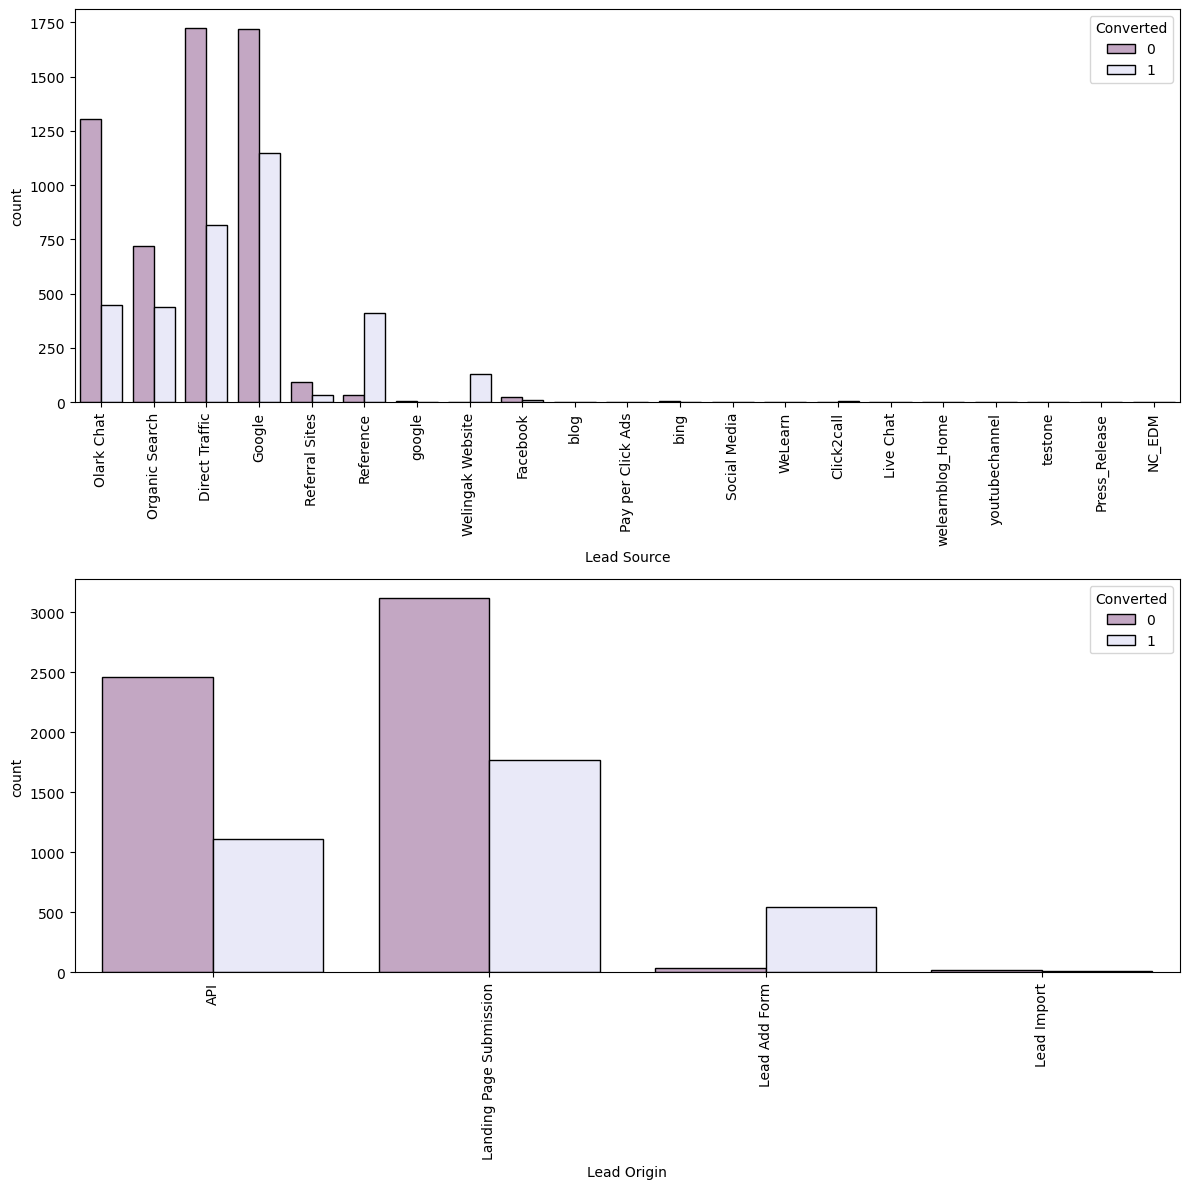

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

colors = ['#c8a2c8', '#e6e6fa']  # lilac and lavender colors
outline_color = 'black'

for i, feature in enumerate(['Lead Source', 'Lead Origin']):
    ax = sns.countplot(x=feature, hue='Converted', data=lead_df, palette=colors, ax=axes[i], edgecolor=outline_color)
    ax.tick_params(axis='x', rotation=90)

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()


OBSERVATION:

* API and Landing Page Submission has less conversion rate(~30%) but counts of the leads from them are considerable*
* The count of leads from the Lead Add Form is pretty low but the conversion rate is very high*
* Lead Import has very less count as well as conversion rate and hence can be ignored*

To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' and also increasing the number of leads from 'Lead Add Form"

In [19]:
# We can clearly observe that the count of leads from various sources are close to negligible and hence we can club them into "Others" source for better visualisation and analysis

lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source')

lead_df['Lead Source'] = lead_df['Lead Source'].replace("google", 'Google')

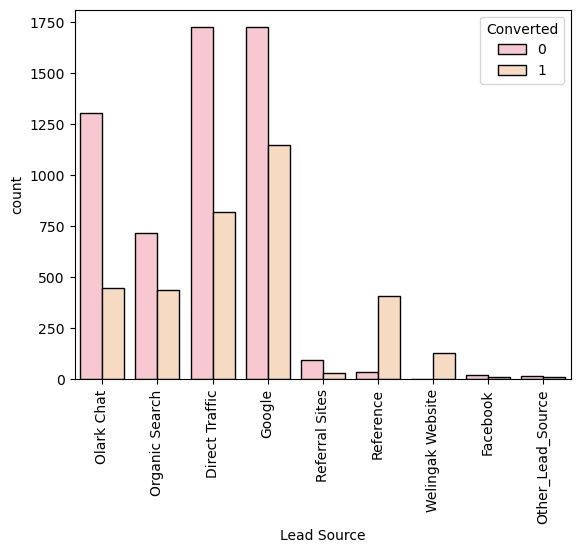

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors
colors = ['#ffc0cb', '#ffdab9']  # pink and peach

# Plot
sns.countplot(x="Lead Source", hue="Converted", data=lead_df, palette=colors, edgecolor='black')
plt.xticks(rotation='vertical')
plt.show()


OBSERVATION:

* The count of leads from the Google and Direct Traffic is maximum
* The conversion rate of the leads from Reference and Welingak Website is maximum

To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website

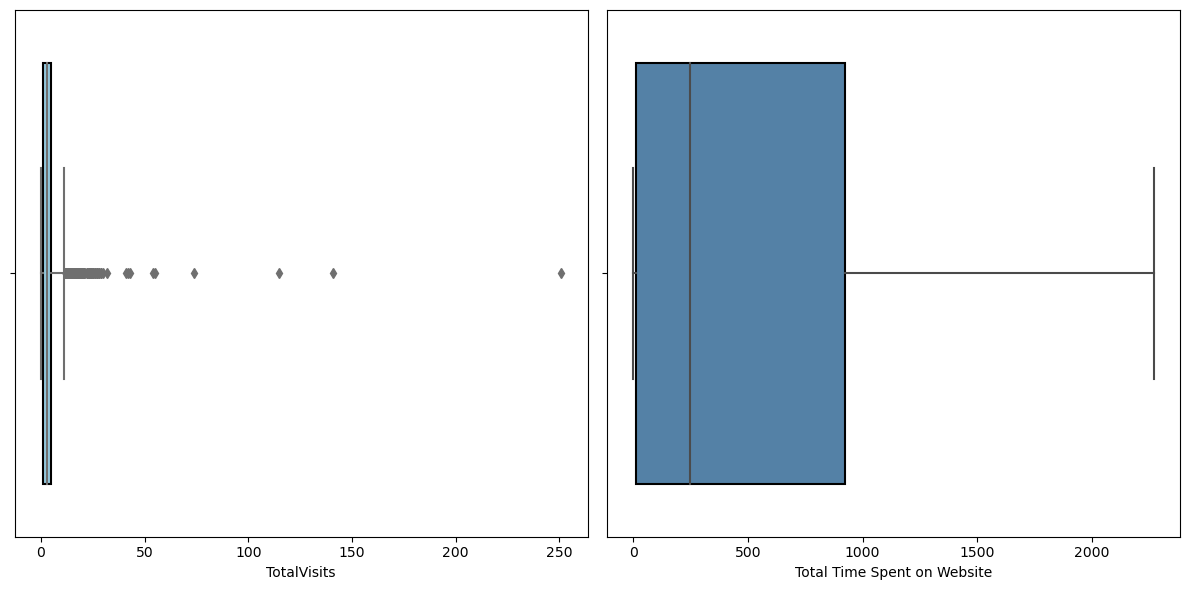

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

colors = ['#87CEEB', '#4682B4']  # sky blue and blue colors
outline_color = 'black'

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    sns.boxplot(x=lead_df[feature], ax=axes[i], color=colors[i], boxprops=dict(edgecolor=outline_color))
    axes[i].set_xlabel(feature)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()



In [22]:
# There are lot of outliers in the Total Visits columns and we can cap this variable to 95 percetile 

q1 = lead_df["TotalVisits"].quantile(0.95)
lead_df["TotalVisits"][lead_df["TotalVisits"] >= q1] = q1

C:\Users\hd\AppData\Local\Temp\ipykernel_1520\2652969926.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lead_df["TotalVisits"][lead_df["TotalVisits"] >= q1] = q1


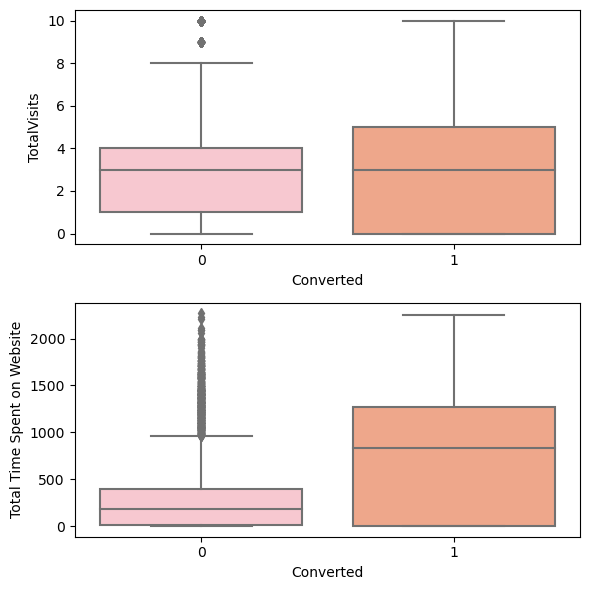

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(6, 6))

colors = ['#ffc0cb', '#ffa07a']  # pink and orange colors

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    sns.boxplot(y=feature, x='Converted', data=lead_df, ax=axes[i], palette=colors)
    axes[i].set_ylabel(feature)

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()


OBSERVATION:

* The median of both the conversion and non-conversion are same and hence nothing conclusive can be said using this information

* Users spending more time on the website are more likely to get converted

Websites can be made more appealing so as to increase the time of the Users on websites

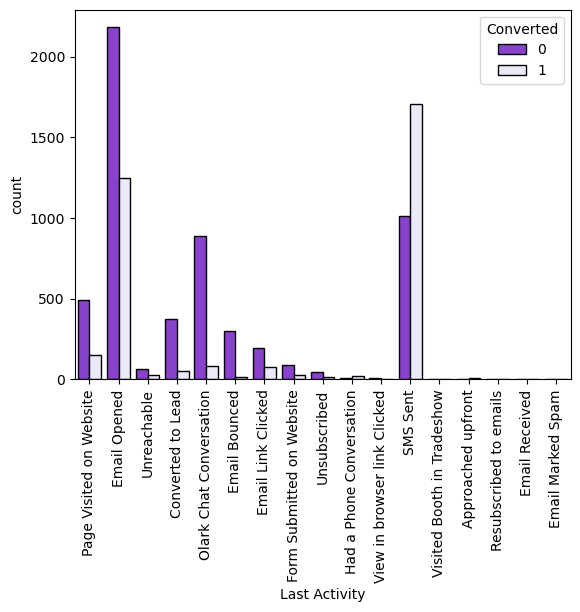

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors
colors = ['#8a2be2', '#e6e6fa']  # violet and lavender colors

# Plot
sns.countplot(x="Last Activity", hue="Converted", data=lead_df, palette=colors, edgecolor='black')
plt.xticks(rotation='vertical')
plt.show()


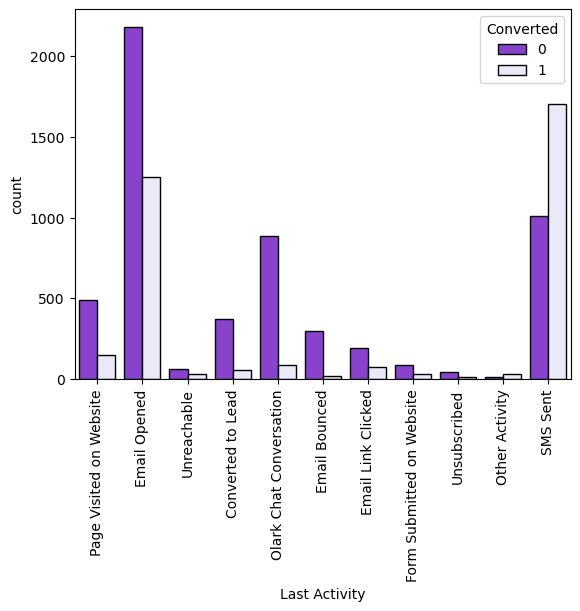

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors
colors = ['#8a2be2', '#e6e6fa']  # violet and lavender colors

# Convert low count categories to 'Other Activity'
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                             'Visited Booth in Tradeshow', 'Approached upfront',
                                                             'Resubscribed to emails','Email Received', 'Email Marked Spam'],
                                                            'Other Activity')

# Plot
sns.countplot(x="Last Activity", hue="Converted", data=lead_df, palette=colors, edgecolor='black')
plt.xticks(rotation='vertical')
plt.show()


OBSERVATION:

* The count of lst activity as "Email Opened" is max
* The conversion rate of SMS sent as last activity is maximum
### We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent

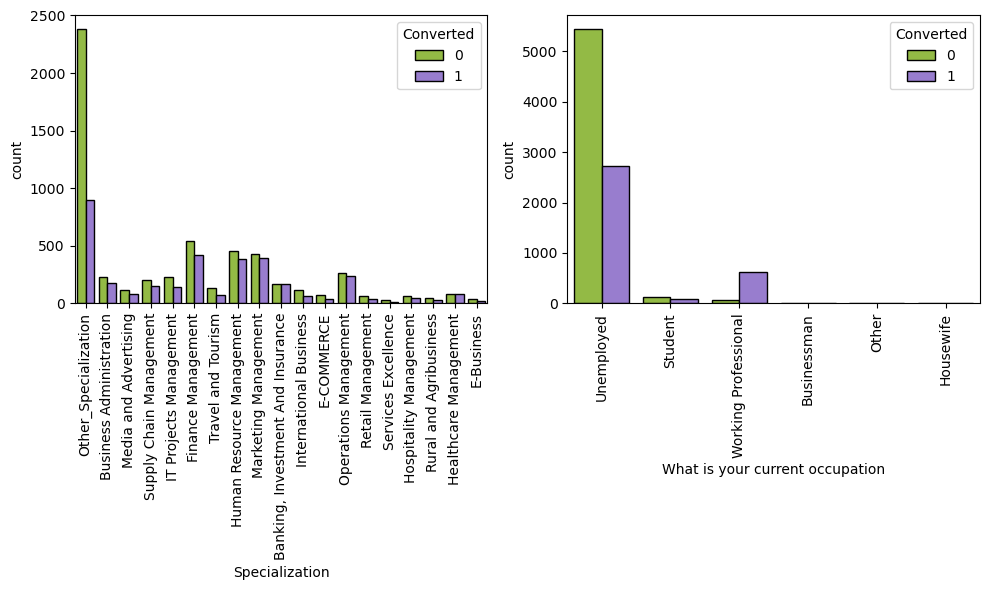

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

colors = ['#9ACD32', '#9370DB']  # light green and light purple colors
outline_color = 'black'

for i, feature in enumerate(["Specialization", "What is your current occupation"]):
    sns.countplot(x=feature, hue="Converted", data=lead_df, palette=colors, ax=axes[i], edgecolor=outline_color)
    axes[i].tick_params(axis='x', rotation=90)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()



OBSERVATION:

* Looking at above plot, no particular inference can be made for Specialization
* Looking at above plot, we can say that working professionals have high conversion rate
* Number of Unemployed leads are more than any other category

To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads

* Country, What matters most to you in choosing a course, City columns have most values corresponding to one value such as India for Country, Mumbai for city and hence there is no particular insights for these columns

In [27]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace("Other", 'Other_Occupation')

In [28]:
lead_df[["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
         "Through Recommendations","Update me on Supply Chain Content","Get updates on DM Content"
         ,"I agree to pay the amount through cheque","A free copy of Mastering The Interview"]].describe()

Search  Magazine  Newspaper Article  X Education Forums  \
count  9074.000000    9074.0        9074.000000         9074.000000   
mean      0.001543       0.0           0.000220            0.000110   
std       0.039251       0.0           0.014845            0.010498   
min       0.000000       0.0           0.000000            0.000000   
25%       0.000000       0.0           0.000000            0.000000   
50%       0.000000       0.0           0.000000            0.000000   
75%       0.000000       0.0           0.000000            0.000000   
max       1.000000       0.0           1.000000            1.000000   

         Newspaper  Digital Advertisement  Through Recommendations  \
count  9074.000000            9074.000000              9074.000000   
mean      0.000110               0.000441                 0.000771   
std       0.010498               0.020992                 0.027766   
min       0.000000               0.000000                 0.000000   
25%       0.000000               0.000000                 0.000000   
50%       0.000000               0.000000                 0.000000   
75%       0.000000               0.000000                 0.000000   
max       1.000000               1.000000                 1.000000   

       Update me on Supply Chain Content  Get updates on DM Content  \
count                             9074.0                     9074.0   
mean                                 0.0                        0.0   
std                                  0.0                        0.0   
min                                  0.0                        0.0   
25%                                  0.0                        0.0   
50%                                  0.0                        0.0   
75%                                  0.0                        0.0   
max                                  0.0                        0.0   

       I agree to pay the amount through cheque  \
count                                    9074.0   
mean                                        0.0   
std                                         0.0   
min                                         0.0   
25%                                         0.0   
50%                                         0.0   
75%                                         0.0   
max                                         0.0   

       A free copy of Mastering The Interview  
count                             9074.000000  
mean                                 0.318272  
std                                  0.465831  
min                                  0.000000  
25%                                  0.000000  
50%                                  0.000000  
75%                                  1.000000  
max                                  1.000000

OBSERVATION:

* We can clearly see that most values in the all the columns are 0 i.e. "No" and hence no inference can be made using these columns

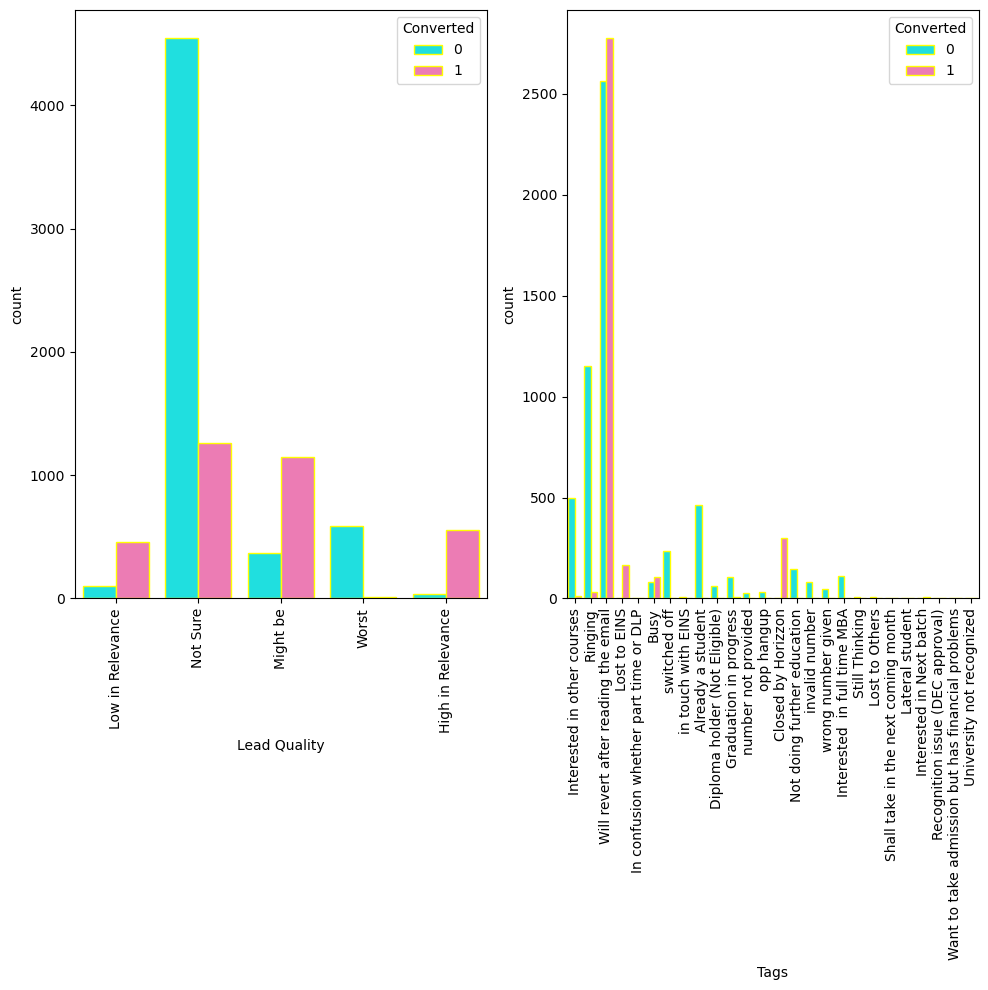

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 10))

colors = ['#00FFFF', '#FF69B4']  # cyan and pink colors
outline_color = 'yellow'

for i, feature in enumerate(["Lead Quality", "Tags"]):
    sns.countplot(x=feature, hue="Converted", data=lead_df, palette=colors, ax=axes[i], edgecolor=outline_color)
    axes[i].tick_params(axis='x', rotation=90)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()


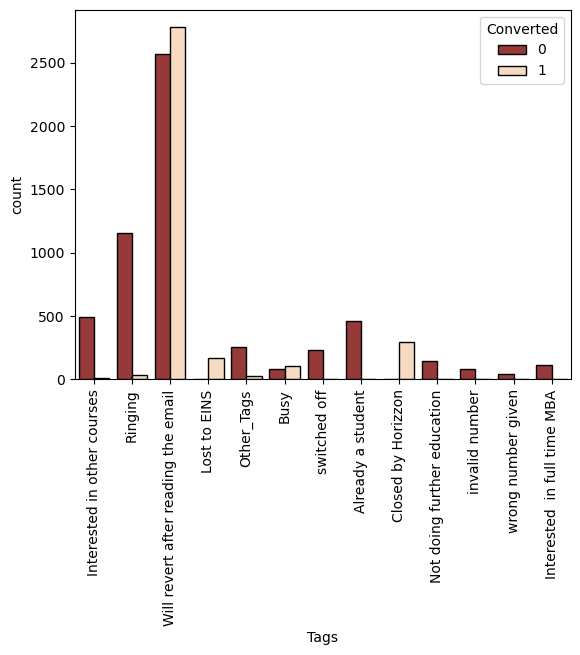

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors
colors = ['#A52A2A', '#FFDAB9']  # brown and peach colors
outline_color = 'black'

# Convert low count categories to 'Other_Tags'
lead_df['Tags'] = lead_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS',
                                           'Diploma holder (Not Eligible)', 'Approached upfront',
                                           'Graduation in progress', 'number not provided', 'opp hangup',
                                           'Still Thinking', 'Lost to Others', 'Shall take in the next coming month',
                                           'Lateral student', 'Interested in Next batch', 'Recognition issue (DEC approval)',
                                           'Want to take admission but has financial problems', 'University not recognized'],
                                          'Other_Tags')

# Plot
sns.countplot(x="Tags", hue="Converted", data=lead_df, palette=colors, edgecolor='black')
plt.xticks(rotation='vertical')
plt.show()


OBSERVATION:

* 'Will revert after reading the email' and 'Closed by Horizzon' have high conversion rate

### SUMMARY:
* To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'API' and 'Landing Page Submission' Lead Origins and also increasing the number of leads from 'Lead Add Form'

* To improve the overall lead conversion rate, we need to focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingak Website'

* Websites can be made more appealing so as to increase the time of the Users on websites

* We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent

* To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads

* We also observed that there are multiple columns which contains data of a single value only. As these columns do not contribute towards any inference, we can remove them from further analysis

In [31]:
# Dropping unnecessary columns

lead_df = lead_df.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call'],1)

lead_df.head()

C:\Users\hd\AppData\Local\Temp\ipykernel_1520\1973515689.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lead_df = lead_df.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',


Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Converted  TotalVisits  \
0      Olark Chat             0          0          0.0   
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0     Other_Specialization                      Unemployed   
1     Other_Specialization                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4     Other_Specialization                      Unemployed   

                                  Tags      Lead Quality    City  \
0          Interested in other courses  Low in Relevance  Mumbai   
1                              Ringing          Not Sure  Mumbai   
2  Will revert after reading the email          Might be  Mumbai   
3                              Ringing          Not Sure  Mumbai   
4  Will revert after reading the email          Might be  Mumbai   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

### Step 5: Dummy Variable Creation

In [32]:
dummy = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Other_Lead_Source  Lead Source_Reference  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0                      0   
4                              0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0                             0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Last Activity_Unreachable  Last Activity_Unsubscribed  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          1                           0   
4                          0                           0   

   Specia

In [33]:
lead_df = lead_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity'], axis=1)
lead_df.head()

Prospect ID  Do Not Email  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0          0          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0          0          5.0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0          1          2.0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0          0          1.0   
4  3256f628-e534-4826-9d63-4a8b88782852             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  
0                            0                   0.0  
1                          674                   2.5  
2                         1532                   2.0  
3                          305                   1.0  
4                         1428                   1.0

In [34]:
lead_df = pd.concat([lead_df, dummy], axis=1)
lead_df.head()

Prospect ID  Do Not Email  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0          0          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0          0          5.0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0          1          2.0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0          0          1.0   
4  3256f628-e534-4826-9d63-4a8b88782852             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Other_Lead_Source  Lead Source_Reference  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0                      0   
4                              0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0               

### Step 6: Test-Train Split

In [35]:
# Putting feature variable to X
X = lead_df.drop(['Prospect ID','Converted'], axis=1)
# Putting response variable to y
y = lead_df['Converted']

print(y)

X.head()

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64


Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Facebook  \
0                          0                        0                     0   
1                          0                        0                     0   
2                          0                        0                     0   
3                          0                        0                     0   
4                          0                        0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Other_Lead_Source  Lead Source_Reference  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0                      0   
4                              0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0                             0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3       

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


### Step 7: Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Assuming X_train is your training data
columns_to_scale = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Fit and transform the selected columns
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# Display the first few rows of the transformed data
print(X_train.head())


      Do Not Email  TotalVisits  Total Time Spent on Website  \
3009             0    -0.432779                    -0.160255   
1012             1    -0.432779                    -0.540048   
9226             0    -1.150329                    -0.888650   
4750             0    -0.432779                     1.643304   
7987             0     0.643547                     2.017593   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3009             -0.179666                                    1   
1012             -0.179666                                    1   
9226             -1.132538                                    0   
4750             -0.179666                                    1   
7987              0.058552                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
3009                          0                        0   
1012                          0                        0   
9226                          0 

In [38]:
### Checking the Conversion Rate

print("Conversion rate is ", (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100)

Conversion rate is  37.85541106458012


### Step 8: Looking at Correlations

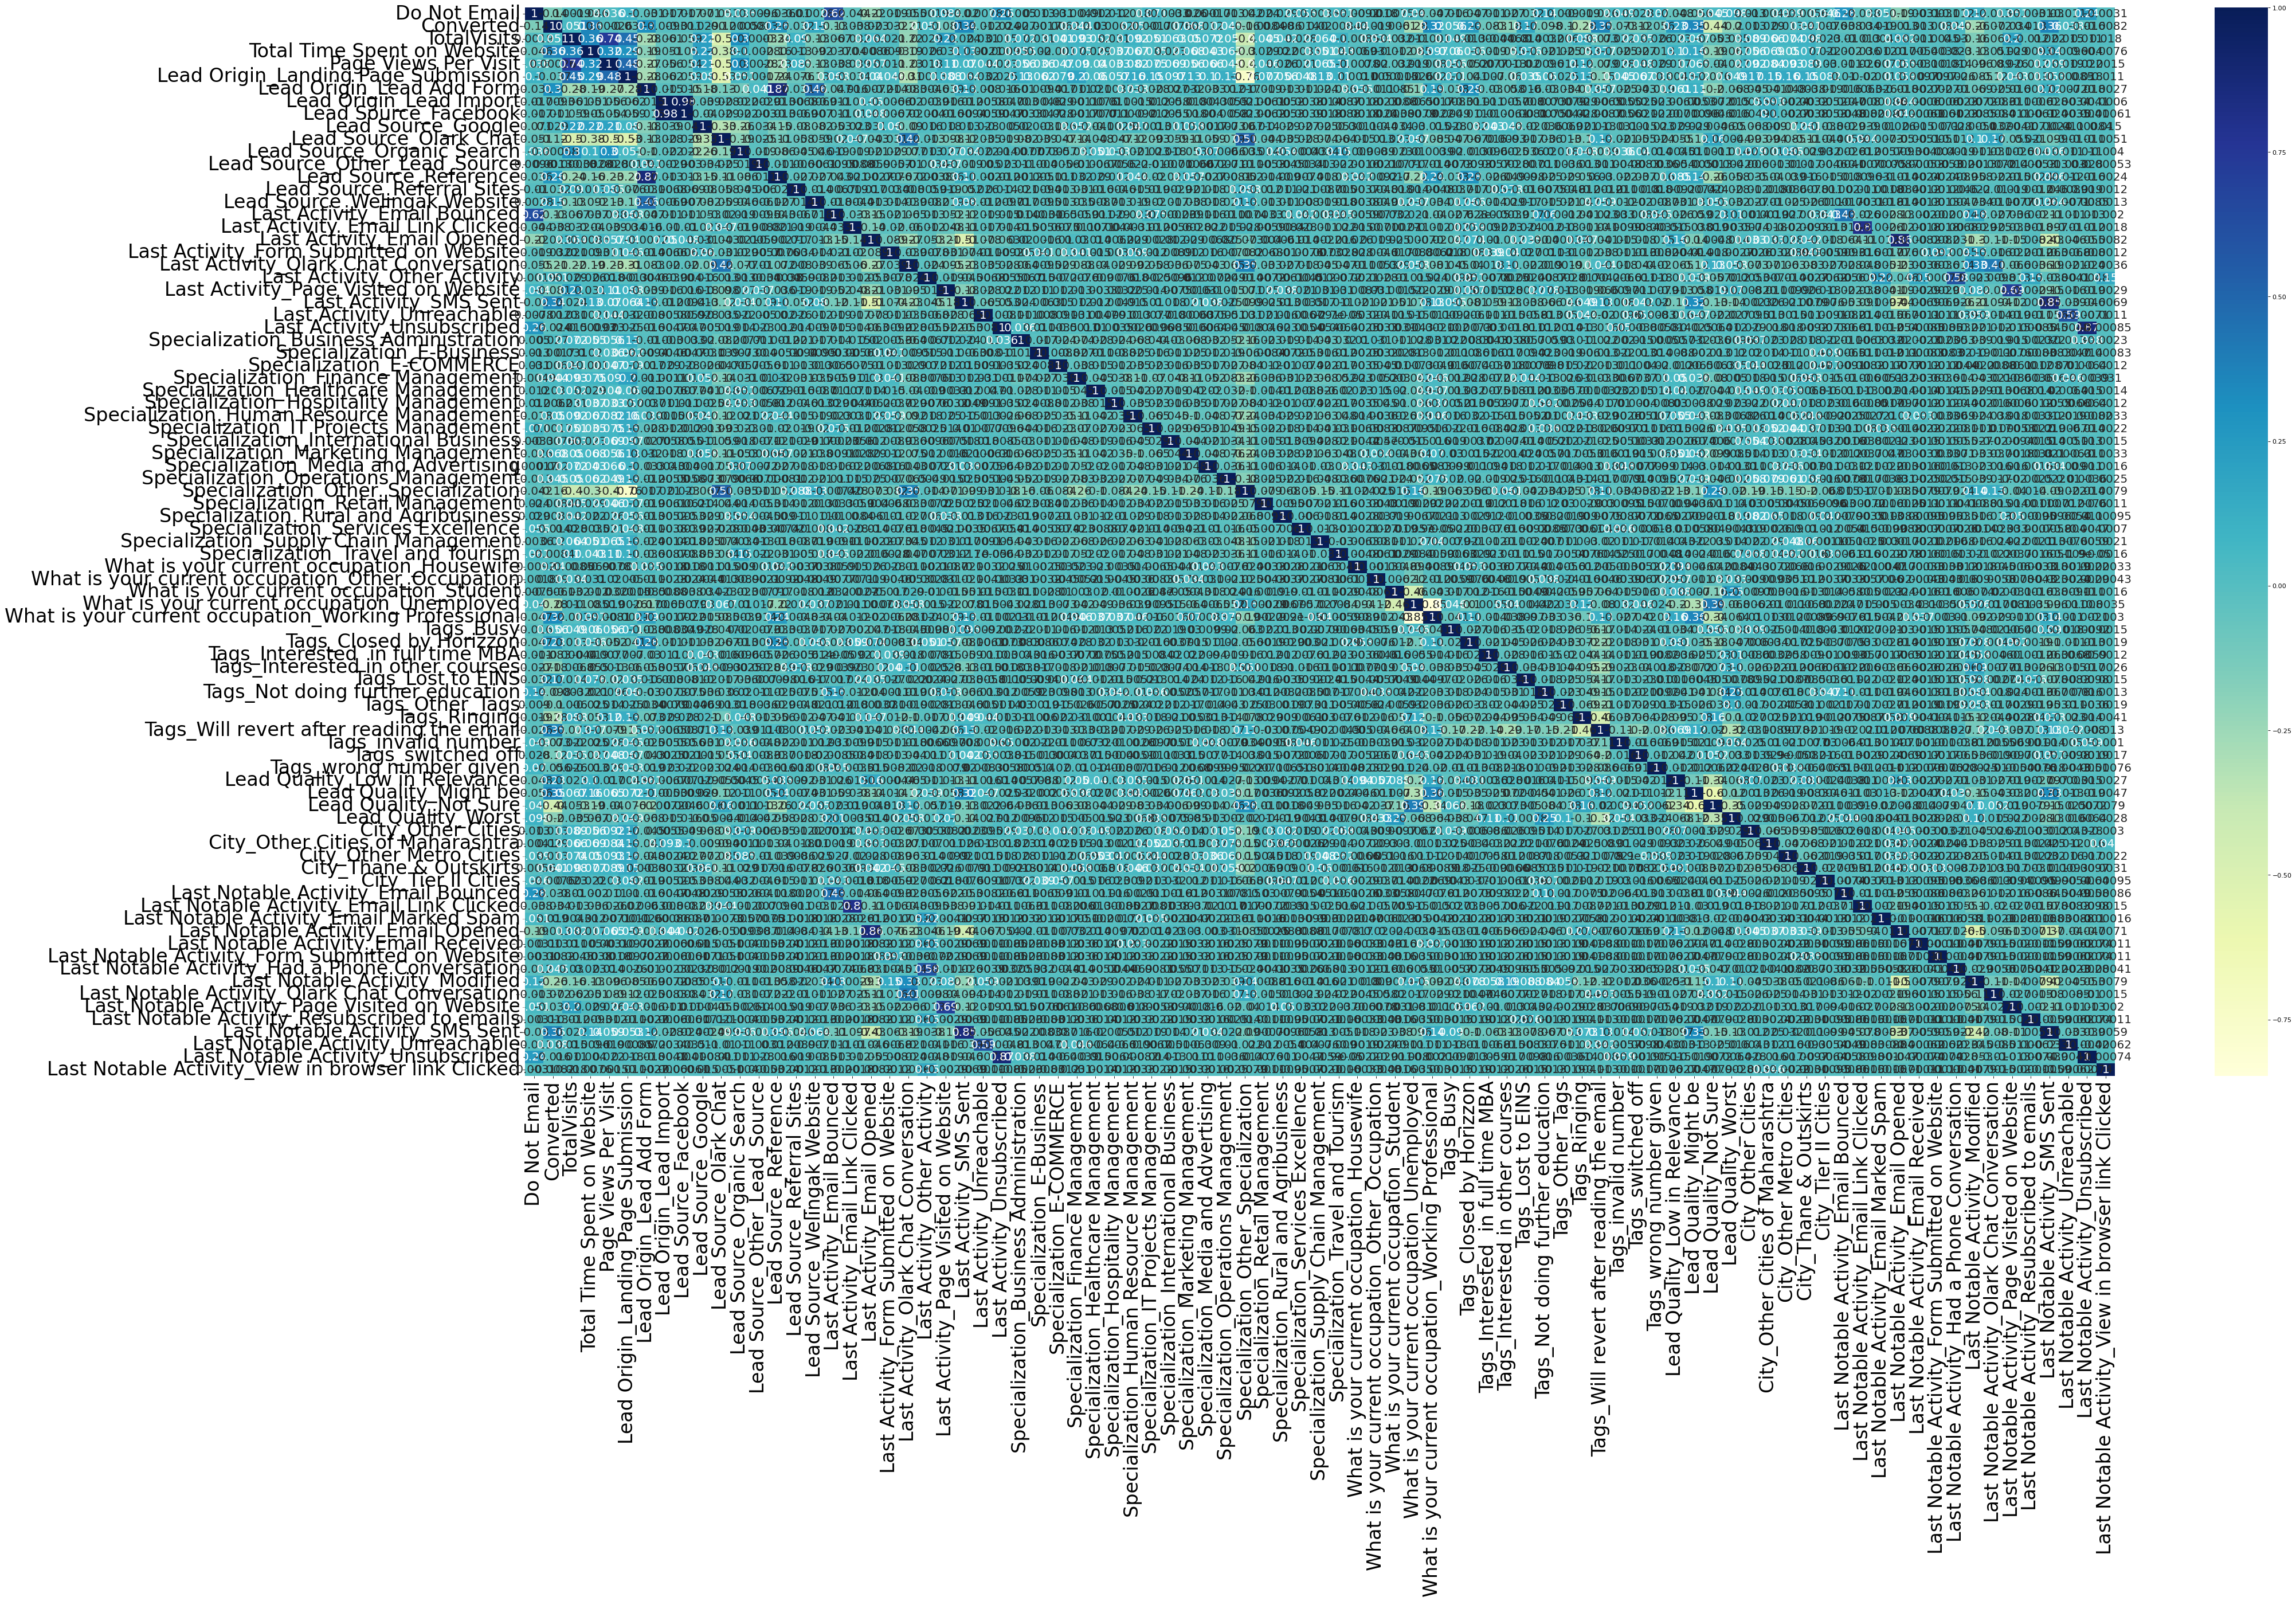

In [39]:
plt.figure(figsize=(55, 35), dpi=80)
sns.heatmap(lead_df.corr(numeric_only=True), annot=True, cmap="YlGnBu", annot_kws={"size": 18})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()


Observation
The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable. - We will refer this map for building the logistic model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.
From above heatmap we can see that:-

* 'Lead Source_Facebook' and 'Lead Origin_Lead Import' having higher correlation of 0.98.
* 'Do Not Email' and 'Last Activity_Email Bounced' having higher correlation.
* 'Lead Origin_Lead Add Form' and 'Lead Source_Referance' having higher correlation of 0.85.
* 'TotalVisits' and 'Page Views Per Visit' having correlation of 0.72.
* 'Lead Origin_Lead Add Form' ,'Lead Source_Welingak Website', 'Last Activity_SMS Sent' and 'What is your current    Occupation_Working Professionals' having positive correlation with our target variable 'Converted'.

### Step 9: Model Building

In [40]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6266
Model Family:                Binomial   Df Model:                           84
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.0
Date:                Tue, 20 Feb 2024   Deviance:                       2508.1
Time:                        13:52:11   Pearson chi2:                 4.00e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6086
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   22.9869   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Do Not Email                                            -1.3826      0.325     -4.256      0.000      -2.019      -0.746
TotalVisits                                              0.1233      0.087      1.422      0.155      -0.047       0.293
Total Time Spent on Website                              1.1441      0.064     17.928      0.000       1.019       1.269
Page Views Per Visit                                    -0.1650      0.085     -1.938      0.053      -0.332       0.002
Lead Origin_Landing Page Submission                     -1.0335      0.219     -4.716      0.000      -1.463      -0.604
Lead Origin_Lead Add Form                               -0.3379      1.283     -0.263      0.792      -2.853       2.177
Lead Origin_Lead Import                                 30.0067   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -28.7618   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.1672      0.154      1.085      0.278      -0.135       0.469
Lead Source_Olark Chat                                   0.9825      0.230      4.275      0.000       0.532       1.433
Lead Source_Organic Search                               0.1674      0.209      0.800      0.424      -0.243       0.578
Lead Source_Other_Lead_Source                            0.7918      0.812      0.975      0.330      -0.800       2.384
Lead Source_Reference                                    1.8413      1.340      1.374      0.170      -0.786       4.469
Lead Source_Referral Sites                              -0.1331      0.488     -0.273      0.785      -1.089       0.823
Lead Source_Welingak Website                             5.5118      1.483      3.716      0.000       2.605       8.419
Last Activity_Email Bounced                             -0.5746      0.872     -0.659      0.510      -2.285       1.135
Last Activity_Email Link Clicked                         0.7746      0.647      1.198      0.231      -0.493       2.042
Last Activity_Email Opened                              -0.0416      0.383     -0.109      0.913      -0.792       0.708
Last Activity_Form Submitted on Website                  0.1326      0.590      0.225      0.822      -1.024       1.289
Last Activity_Olark Chat Conversation                   -0.5979      0.391     -1.528      0.127      -1.365       0.169
Last Activity_Other Activity                             1.4100      1.206      1.170      0.242      -0.953       3.773
Last Activity_Page Visited on Website                    0

In [41]:
#Importing 'LogisticRegression' :-

from sklearn.linear_model import LogisticRegression

# Creating LogisticRegression Object called 'regressor':-

regressor = LogisticRegression()

In [42]:
#Importing 'RFE' for feature selection:-

from sklearn.feature_selection import RFE

rfe = RFE(regressor,15)             # running RFE with 15 variables as output

rfe = rfe.fit(X_train, y_train)

TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

In [ ]:
#Displaying columns selected by RFE and their weights:-

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
# Storing columns selected by RFE into 'col' and displaying it:-

col = X_train.columns[rfe.support_]
col

In [ ]:
# Displaying columns which are not selected by RFE:-

X_train.columns[~rfe.support_]

In [ ]:
# Creating X_test dataframe with RFE selected variables:-

X_train_rfe = X_train[col]

### Assessing the model with StatsModels

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

### Creating a dataframe with the true convertion status and the predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

In [ ]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [ ]:
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

### Checking VIFs

In [ ]:
def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending = False)
    print(vif_df)

calculate_vif(X_train[col])

* All variables have a good value of VIF. But we observed earlier that the column "Tags_invalid number" has high p-value and hence we will drop this column and remake the model.

In [ ]:
col = col.drop('Tags_invalid number')
col

In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

In [ ]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Convert_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

### The accuracy is still practically the same.

### Let's now check the VIFs again

In [ ]:
calculate_vif(X_train[col])

### Comment: All variables have a good value of VIF and p-values. So we need not drop any more variables and we can proceed with making predictions using this model only

In [ ]:
# function name : evaluate_model
# argumet : y_true, y_predicted
# prints Confusion matrix, accuracy, Sensitivity, Specificity, False Positive Rate, Positive Predictive Value
# returns accuracy, Sensitivity, Specificity

def evaluate_model(y_true, y_predicted, print_score=False):
    confusion = metrics.confusion_matrix(y_true, y_predicted)
    # Predicted     not_converted    converted
    # Actual
    # not_converted        TN         FP
    # converted            FN         TP

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    accuracy_sc = metrics.accuracy_score(y_true, y_predicted)
    sensitivity_score = TP / float(TP+FN)
    specificity_score = TN / float(TN+FP)
    precision_sc = precision_score(y_true, y_predicted)
    
    if print_score:
        print("Confusion Matrix :\n", confusion)
        print("Accuracy :", accuracy_sc)
        print("Sensitivity :", sensitivity_score)
        print("Specificity :", specificity_score)
        print("Precision :", precision_sc)
        
    return accuracy_sc, sensitivity_score, specificity_score, precision_sc

In [ ]:
# Evaluating model
evaluate_model(y_train_pred_final.Convert, y_train_pred_final.predicted, print_score=True)

### Step 11: Plotting the ROC Curve

An ROC curve

* shows tradeoff between sensitivity and specificity (increase in one will cause decrease in other).
* The closer the curve follows the y-axis and then the top border of the ROC space, means more area under the curve and the more accurate the test.
* The closer the curve comes to the 45-degree diagonal of the ROC space i.e. the reference line, means less area and the less accurate is the test.

Here, our goal is to have achieve good sensitivity score

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

### Step 12: Finding optimal value of the cut off

In [ ]:
# Predicting Convert status with different probability cutoffs

for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs from 0.1 to 0.9.

df = pd.DataFrame(columns = ['probability_score','accuracy_score','sensitivity_score','specificity_score','precision_score'])

for i in [float(x)/10 for x in range(10)]:
    (accuracy_score,sensitivity_score,specificity_score,precision_sc) = evaluate_model(y_train_pred_final.Convert, y_train_pred_final[i])
    df.loc[i] =[i,accuracy_score,sensitivity_score,specificity_score,precision_sc]

df

In [ ]:
df.plot.line(x='probability_score', y=['accuracy_score','sensitivity_score','specificity_score'])
plt.show()

### Precision-Recall Trade off

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

Comment:

* In Sensitivity-Specificity-Accuracy plot 0.27 probability looks optimal. In Precision-Recall Curve 0.3 looks optimal.

* We are taking 0.27 is the optimum point as a cutoff probability and assigning Lead Score in training data

In [ ]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.27 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

In [ ]:
# Evaluating model performance on training data

evaluate_model(y_train_pred_final.Convert, y_train_pred_final.Convert_predicted, print_score=True)

In [ ]:
# Getting the predicted values on the train set
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_df['Prospect ID'] = y_test_df.index

y_predicted_final = pd.concat([y_test_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.27 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()

In [ ]:
# Evaluating model performance on test data

evaluate_model(y_predicted_final.Converted, y_predicted_final.final_predicted, print_score=True)

### Step 12 : Final Model

In [ ]:
# Builds a logistic regression model and returns predicted values on training dataset
# when training data, test data and probability cutoff is given

def build_model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):
    
    # Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    
    y_train_pred_final = pd.DataFrame({'Prospect ID':y_train.index, 'Converted':y_train.values, 'Convert_Probability':y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print("------------------Result of training data-------------------")
    print(y_train_pred_final.head())
    
    # Predicting Lead Score on Test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    y_test_pred_final = pd.DataFrame({'Prospect ID':y_test.index, 'Converted':y_test.values, 'Convert_Probability':y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    print("------------------Result of test data-------------------")
    print(y_test_pred_final.head())
    
    print("------------------Model Evaluation Metrics-------------------")
    evaluate_model(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, print_score=True)
    
    return y_test_pred_final

In [ ]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.27)

In [ ]:
print("Features used in Final Model :", col)

print("-----------------------Feature Importance--------------------")
print(res.params)

### Conclusion:

* The logistic regression model predicts the probability of the target variable having a certain value, rather than predicting the value of the target variable directly. Then a cutoff of the probability is used to obtain the predicted value of the target variable.

* Here, the logistic regression model is used to predict the probabilty of conversion of a customer.

* Optimum cut off is chosen to be 0.27 i.e. any lead with greater than 0.27 probability of converting is predicted as Hot Lead (customer will convert) and any lead with 0.27 or less probability of converting is predicted as Cold Lead (customer will not convert)

* Our final Logistic Regression Model is built with 14 features.

* Features used in final model are ['Do Not Email', 'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation']

* The top three categorical/dummy variables in the final model are ‘Tags_Lost to EINS’, ‘Tags_Closed by Horizzon’, ‘Lead Quality_Worst’ with respect to the absolute value of their coefficient factors.

‘Tags_Lost to EINS’, ‘Tags_Closed by Horizzon’ are obtained by encoding original categorical variable ‘Tags’. ‘Lead Quality_Worst’ is obtained by encoding the categorical variable ‘Lead Quality’.

* Tags_Lost to EINS (Coefficient factor = 9.578632)

* Tags_Closed by Horizzon (Coefficient factor = 8.555901)

* Lead Quality_Worst (Coefficient factor =-3.943680)

* The final model has Sensitivity of 0.928, this means the model is able to predict 92% customers out of all the converted customers, (Positive conversion) correctly.

* The final model has Precision of 0.68, this means 68% of predicted hot leads are True Hot Leads.

* We have also built an reusable code block which will predict Convert value and Lead Score given training, test data and a cut-off. Different cutoffs can be used depending on the use-cases (for eg. when high sensitivity is required, when model have optimum precision score etc.)

### Subjective Question


* 3.  X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.

In [ ]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.1)

### Subjective Question

* 4 Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

In [ ]:
build_model_cutoff(X_train[col], y_train, X_test[col], y_test, cutoff=0.9)